This notebooks provides an example of plotting data for multiple crystals within the same i$\eta$ ring. It helps us understand how the measurements are taken and also how different crystals show different responses even though they receive similar levels of radiation doses throught the run. 

In [2]:
import os, sys
sys.path.append(os.getcwd().replace('/notebooks',''))
import pandas as pd #dataframes etc
import numpy as np
from sklearn import preprocessing
from common.pltutils import getNcols, plt
import seaborn as sns

plt.style.use('../common/default.style')

In this example i$\eta$ ring 66 is selected which corresponds to a pseudorapidity of 1.151 and lies within the Barrel region of the ECAL. 

In [18]:
filename = '../data/raw/plus_z/ring_66.csv'
df = pd.read_csv(filename)[['xtal_id','calibration','laser_datetime','int_deliv_inv_ub']]
df = df[((df['calibration']>0.7) & (df['calibration']<1.05))]

A look at the 2017 data for ring 1, where the radiation damage is minimum (calibration values vs time). There are some outliers in the measurements. Hence, a cut of [0.5,1.7] is used on the calibration values. Next, the crystal corresponding to the highest calibration value and the lowerst calibration value are selected. Apart from those crystals, additional 10 crystals are selected from the same i$\eta$ ring such that the distance between two consecutive crystals is 30$^\circ$ in the azimuthal plane.

<Figure size 640x480 with 0 Axes>

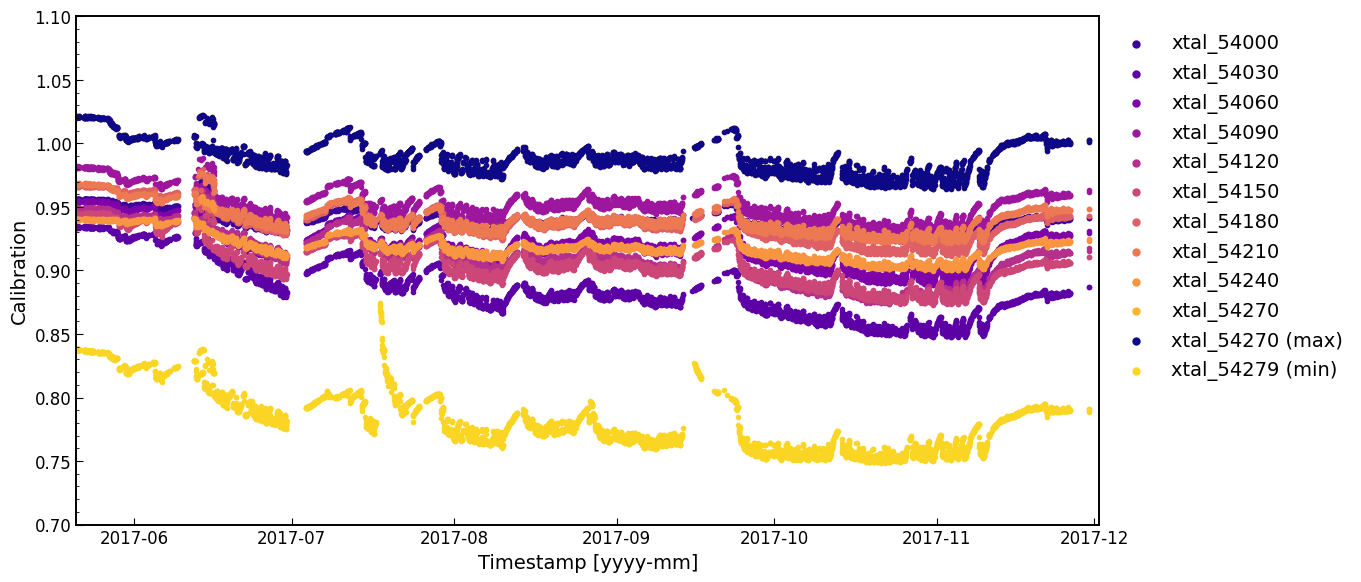

In [17]:
plt.clf()
fig, ax = plt.subplots(figsize=(13.2, 6.6))
colors = getNcols(12)

# get the crystal with maximum and minimum calibration 
min_index = df[['calibration']].idxmin()
max_index = df[['calibration']].idxmax()

max_calib_xtal = df.loc()[max_index]['xtal_id'].item()
min_calib_xtal = df.loc()[min_index]['xtal_id'].item()

for i in range(10):
    id_ = 54000+30*i
    label_ = 'xtal_{}'.format(id_)
    df_slice = df[(df['xtal_id']==id_)]
    ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'], label=label_, color=colors[i+1], marker='.')

df_slice = df[(df['xtal_id']==max_calib_xtal)]
ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'],
           label='xtal_{} (max)'.format(max_calib_xtal), color=colors[0], marker='.')   

df_slice = df[(df['xtal_id']==min_calib_xtal)]
sc_ = ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'],
           label='xtal_{} (min)'.format(min_calib_xtal), color=colors[11], marker='.')  

legend = ax.legend(bbox_to_anchor=(1,1), ncol=1, fontsize=14, frameon=False)
plt.ylim(0.7, 1.1)
plt.xlim(pd.to_datetime('2017-05-21 00:00:00'), pd.to_datetime('2017-12-02 00:00:00'))
plt.ylabel('Calibration', fontsize=14)
plt.xlabel('Timestamp [yyyy-mm]', fontsize=14)
ax.tick_params(which='minor', length=2)
ax.tick_params(which='major', length=5)
for handle_ in legend.legendHandles: handle_.set_sizes([100.])
plt.show()

<Figure size 640x480 with 0 Axes>

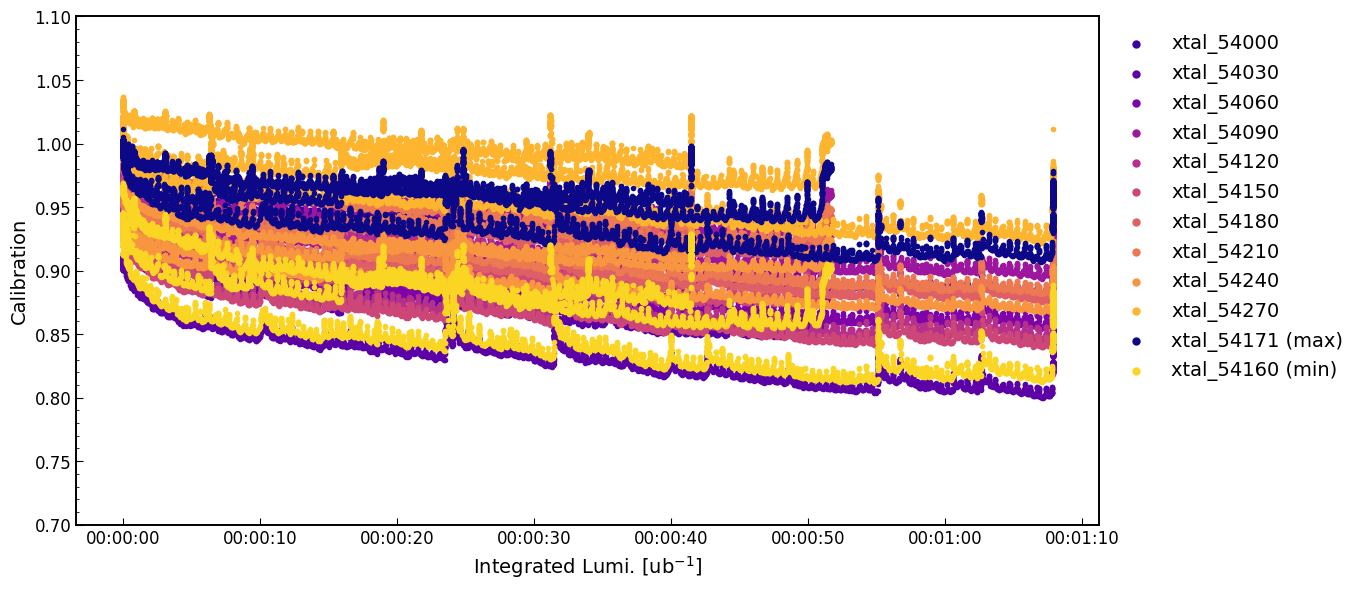

In [20]:
# A look at the 2017 data for ring 1, where the radiation damage is minimum (calibration values vs integrated luminosity)
plt.clf()
fig, ax = plt.subplots(figsize=(13.2, 6.6))
colors = getNcols(12)

# get the crystal with maximum and minimum calibration 
min_index = df[['calibration']].idxmin()
max_index = df[['calibration']].idxmax()

max_calib_xtal = df.loc()[max_index]['xtal_id'].item()
min_calib_xtal = df.loc()[min_index]['xtal_id'].item()

for i in range(10):
    id_ = 54000+30*i
    label_ = 'xtal_{}'.format(id_)
    df_slice = df[(df['xtal_id']==id_)]
    ax.scatter(pd.to_datetime(df_slice['int_deliv_inv_ub']), df_slice['calibration'], label=label_, color=colors[i+1], marker='.')

df_slice = df[(df['xtal_id']==max_calib_xtal)]
ax.scatter(pd.to_datetime(df_slice['int_deliv_inv_ub']), df_slice['calibration'],
           label='xtal_{} (max)'.format(max_calib_xtal), color=colors[0], marker='.')   

df_slice = df[(df['xtal_id']==min_calib_xtal)]
sc_ = ax.scatter(pd.to_datetime(df_slice['int_deliv_inv_ub']), df_slice['calibration'],
           label='xtal_{} (min)'.format(min_calib_xtal), color=colors[11], marker='.') 

legend = ax.legend(bbox_to_anchor=(1,1), ncol=1, fontsize=14, frameon=False)
plt.ylim(0.7, 1.1)
plt.ylabel('Calibration', fontsize=14)
plt.xlabel('Integrated Lumi. [ub$^{-1}$]', fontsize=14)
ax.tick_params(which='minor', length=2)
ax.tick_params(which='major', length=5)
for handle_ in legend.legendHandles: handle_.set_sizes([100.])
plt.show()

<Figure size 432x288 with 0 Axes>

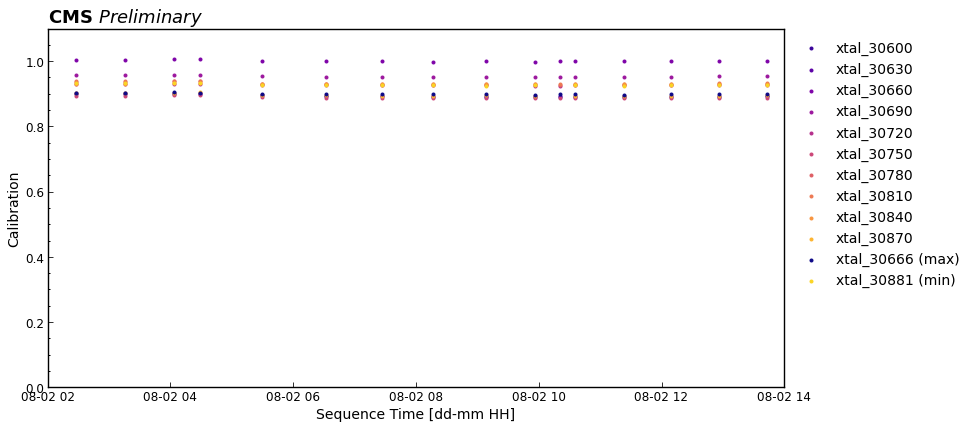

In [113]:
plt.clf()
fig, ax = plt.subplots(figsize=(13.2, 6.6))
colors = getNcols(12)

# get the crystal with maximum and minimum calibration 
min_index = df[df['fill']==6035][['calibration']].idxmin()
max_index = df[df['fill']==6035][['calibration']].idxmax()

max_calib_xtal = df.iloc()[max_index]['laser_datetime'].item()
min_calib_xtal = df.iloc()[min_index]['laser_datetime'].item()

for i in range(10):
    id_ = 30600+30*i
    label_ = 'xtal_{}'.format(id_)
    df_slice = df[(df['laser_datetime']==id_) & (df['fill']==6035)]
    ax.scatter(pd.to_datetime(df_slice['seq_datetime']), df_slice['calibration'], label=label_, color=colors[i+1], marker='.')

df_slice = df[(df['laser_datetime']==max_calib_xtal) & (df['fill']==6035)]
ax.scatter(pd.to_datetime(df_slice['seq_datetime']), df_slice['calibration'],
           label='xtal_{} (max)'.format(max_calib_xtal), color=colors[0], marker='.')   

df_slice = df[(df['laser_datetime']==min_calib_xtal) & (df['fill']==6035)]
sc_ = ax.scatter(pd.to_datetime(df_slice['seq_datetime']), df_slice['calibration'],
           label='xtal_{} (min)'.format(min_calib_xtal), color=colors[11], marker='.')  

ax.legend(bbox_to_anchor=(1,1), ncol=1, fontsize=14, frameon=False)
plt.ylim(0, 1.1)
plt.xlim(pd.to_datetime('2017-08-02 02:00:00'), pd.to_datetime('2017-08-02 14:00:00'))
plt.ylabel('Calibration', fontsize=14)
plt.xlabel('Sequence Time [dd-mm HH]', fontsize=14)
cms = plt.text(x=pd.to_datetime('2017-08-02 02:00:00'), y=1.1, s="CMS $\it{Preliminary}$",
    fontsize=18, fontweight='bold',
    fontfamily='sans-serif',
    horizontalalignment='left', 
    verticalalignment='bottom')
ax.tick_params(which='minor', length=2)
ax.tick_params(which='major', length=5)
plt.show()

<Figure size 432x288 with 0 Axes>

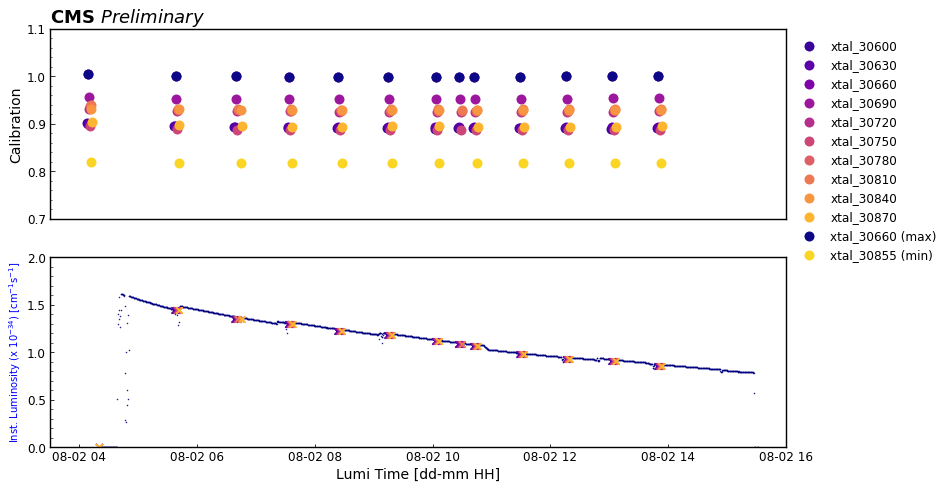

In [13]:
plt.clf()
plt.figure(figsize=(13.2,7.7))
ax = plt.subplot(211)
colors = getNcols(12)

# get the crystal with maximum and minimum calibration 
min_index = df[df['fill']==6035][['calibration']].idxmin()
max_index = df[df['fill']==6035][['calibration']].idxmax()

max_calib_xtal = df.loc()[max_index]['laser_datetime'].item()
min_calib_xtal = df.loc()[min_index]['laser_datetime'].item()

for i in range(10):
    id_ = 30600+30*i
    label_ = 'xtal_{}'.format(id_)
    df_slice = df[(df['laser_datetime']==id_) & (df['fill']==6035)]
    ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'], label=label_,
               color=colors[i+1], alpha=1.0, lw=0, s=100.0)

df_slice = df[(df['laser_datetime']==max_calib_xtal) & (df['fill']==6035)]
ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'],
           label='xtal_{} (max)'.format(max_calib_xtal), color=colors[0],
           alpha=1.0, lw=0, s=100.0)

df_slice = df[(df['laser_datetime']==min_calib_xtal) & (df['fill']==6035)]
sc_ = ax.scatter(pd.to_datetime(df_slice['laser_datetime']), df_slice['calibration'],
           label='xtal_{} (min)'.format(min_calib_xtal), color=colors[11],
           alpha=1.0, lw=0, s=100.0)

ax.legend(bbox_to_anchor=(1,1), ncol=1, fontsize=12, frameon=False)
plt.ylim(0.7, 1.1)
plt.xlim(pd.to_datetime('2017-08-02 03:30:00'), pd.to_datetime('2017-08-02 16:00:00'))
plt.ylabel('Calibration', fontsize=14)
ax.axes.set_xticks([])
cms = plt.text(x=pd.to_datetime('2017-08-02 03:30:00'), y=1.1, s="CMS $\it{Preliminary}$",
    fontsize=18, fontweight='bold',
    fontfamily='sans-serif',
    horizontalalignment='left', 
    verticalalignment='bottom')
ax.tick_params(which='minor', length=2)
ax.tick_params(which='major', length=5)

ax1 = plt.subplot(212)
# twin object for two different y-axis on the sample plot
ax1.scatter(pd.to_datetime(lumi_df_08_17[lumi_df_08_17['fill']==6035]['time']),
            lumi_df_08_17[lumi_df_08_17['fill']==6035]['inst_lumi'].astype(float), marker='.', s=1.0, color='navy')
for i in range(10):
    id_ = 30600+30*i
    label_ = 'xtal_{}'.format(id_)
    df_slice = df[(df['laser_datetime']==id_) & (df['fill']==6035)]
    ax1.scatter(pd.to_datetime(df_slice['time']), df_slice['inst_lumi'], label=label_,
               color=colors[i+1], marker='x', s=40)
plt.xlim(pd.to_datetime('2017-08-02 03:30:00'), pd.to_datetime('2017-08-02 16:00:00'))
ax1.set_ylabel("Inst. Luminosity (x 10$^{-34}$) [cm$^{-1}$s$^{-1}]$",  color="blue")
plt.ylim(0,2)
plt.xlabel('Lumi Time [dd-mm HH]', fontsize=14)
#plt.show()
plt.savefig('ring1_xtals_lumi.png', dpi=300)

<Figure size 432x288 with 0 Axes>

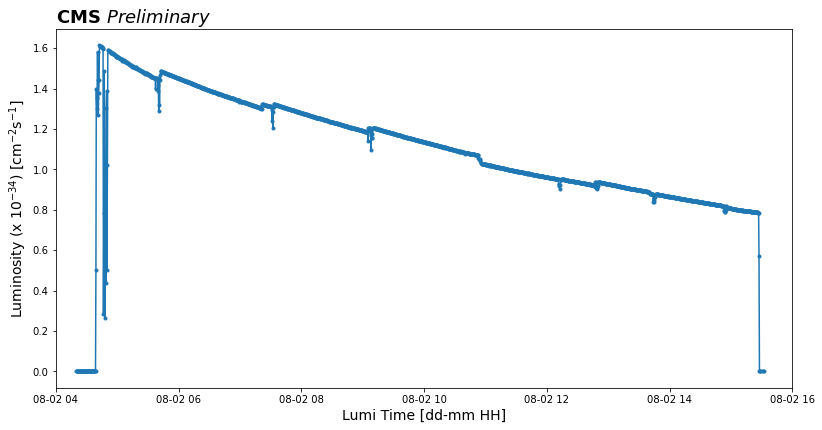

In [29]:
plt.clf()
fig, ax = plt.subplots(figsize=(13.2, 6.6))
#ax.tick_params(which='minor', length=2)
#ax.tick_params(which='major', length=5)
min_y = lumi_df_08_17[lumi_df_08_17['fill']==6035]['inst_lumi'].astype(float).min()
max_y = lumi_df_08_17[lumi_df_08_17['fill']==6035]['inst_lumi'].astype(float).max()
ax.plot(pd.to_datetime(lumi_df_08_17[lumi_df_08_17['fill']==6035]['time']),
            lumi_df_08_17[lumi_df_08_17['fill']==6035]['inst_lumi'].astype(float), marker='.')
plt.xlim(pd.to_datetime('2017-08-02 04:00:00'), pd.to_datetime('2017-08-02 16:00:00'))
plt.ylabel('Luminosity (x 10$^{-34}$) [cm$^{-2}$s$^{-1}$]', fontsize=14)
plt.xlabel('Lumi Time [dd-mm HH]', fontsize=14)
cms = plt.text(x=pd.to_datetime('2017-08-02 04:00:00'), y=max_y*1.05, s="CMS $\it{Preliminary}$",
    fontsize=18, fontweight='bold',
    fontfamily='sans-serif',
    horizontalalignment='left', 
    verticalalignment='bottom')
plt.show()

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(pd.to_datetime(test_iov.laser_datetime), test_lumi.int_deliv_inv_ub+1e10, label="laser time")
ax.legend()

AttributeError: 'DataFrame' object has no attribute 'laser_datetime'

In [ ]:
#lets plot the correlation matrix
fig, ax = plt.subplots(figsize=(20,20))

ax.set_title('Correlation Matrix')
corr1 = multi_df_clean.corr()
ax = sns.heatmap(
    corr1, 
    vmin=0.50, vmax=1, center=0.75,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#fix for matplotlib 3.1.1 issue (fixed in 3.1.2??)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!